In [175]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Source signal

In [197]:
# creating the source signal

# parameters for the signal
signal_1_freq = 20 #Hz
signal_2_freq = signal_1_freq/2 #Hz
fs = 1000 #Hz sampling frequency
sample_time = 1 #s

N = sample_time*fs #number of samples in the signal
t = np.linspace(0, sample_time, N) # time vector

# signal vector
signal_1 = 0.5* np.sin(2*np.pi*signal_1_freq*t) 
signal_2 = np.sin(2*np.pi*signal_2_freq*t) 
signal = signal_1 + signal_2 

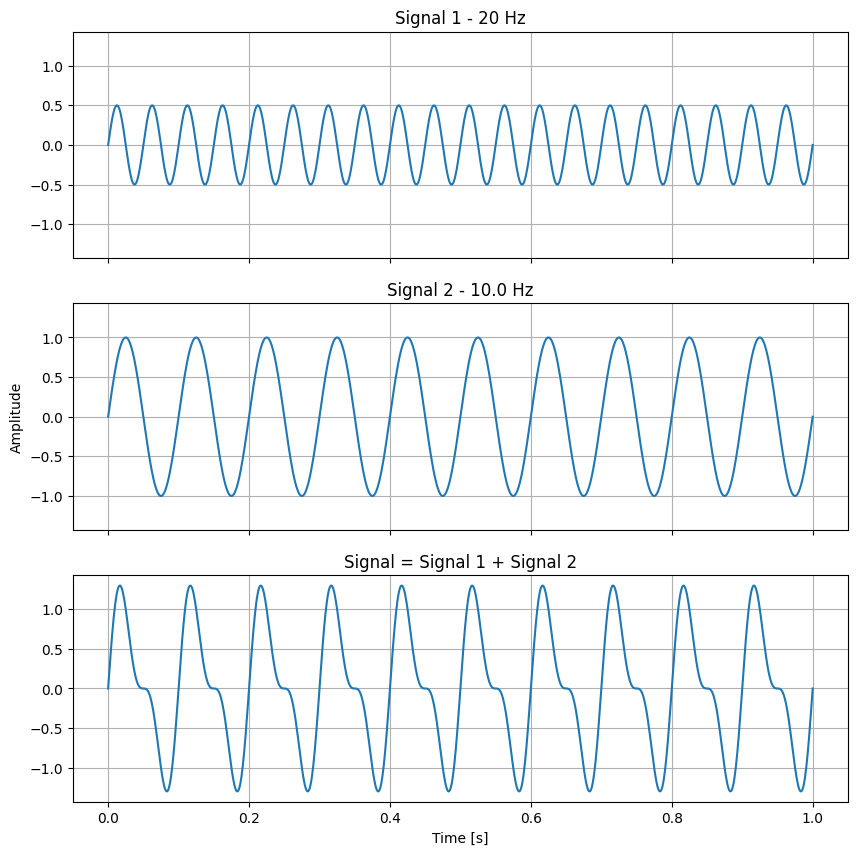

In [198]:
fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True, sharey=True)
ax[0].plot(t, signal_1)
ax[0].grid(True)
ax[0].set_title(f'Signal 1 - {signal_1_freq} Hz')
ax[1].plot(t, signal_2)
ax[1].grid(True)
ax[1].set_title(f'Signal 2 - {signal_2_freq} Hz')
ax[2].plot(t, signal)
ax[2].grid(True)
ax[2].set_title('Signal = Signal 1 + Signal 2')

_ = ax[1].set_ylabel('Amplitude')
_ = ax[2].set_xlabel('Time [s]')


## Noise add

In [199]:
# Generate gaussian noise
mu = 0  # mean
sigma = 1  # standard deviation
white_noise = np.random.normal(mu, sigma, N)
# Add the white gaussian noise to the signal
white_noise_signal = signal + white_noise

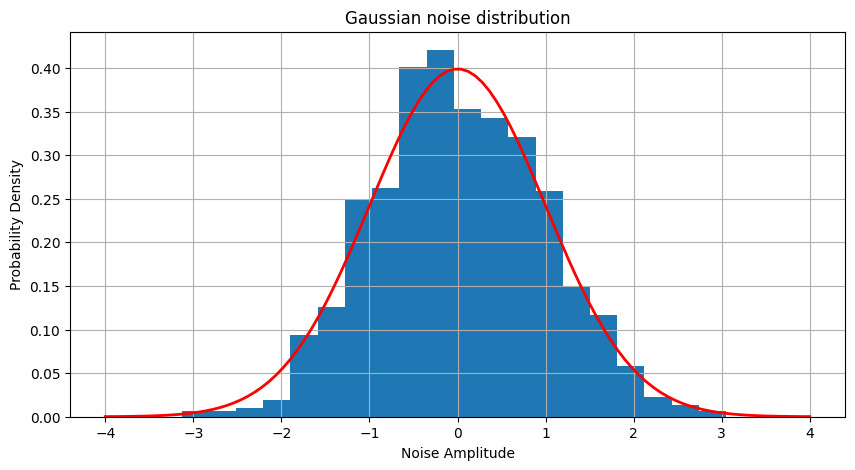

In [200]:
# Seeing the distribution of the noise
fig, ax = plt.subplots(1,1, figsize=(10,5))
_=ax.hist(white_noise, bins=20,density=True)
ax.grid(True)# Generate random data from a Gaussian distribution



# Plot the probability density function (PDF) of the Gaussian distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2 / (2*sigma**2))
plt.plot(x, pdf, color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Noise Amplitude')
plt.ylabel('Probability Density')
plt.title('Gaussian noise distribution')

# Show the plot
plt.show()


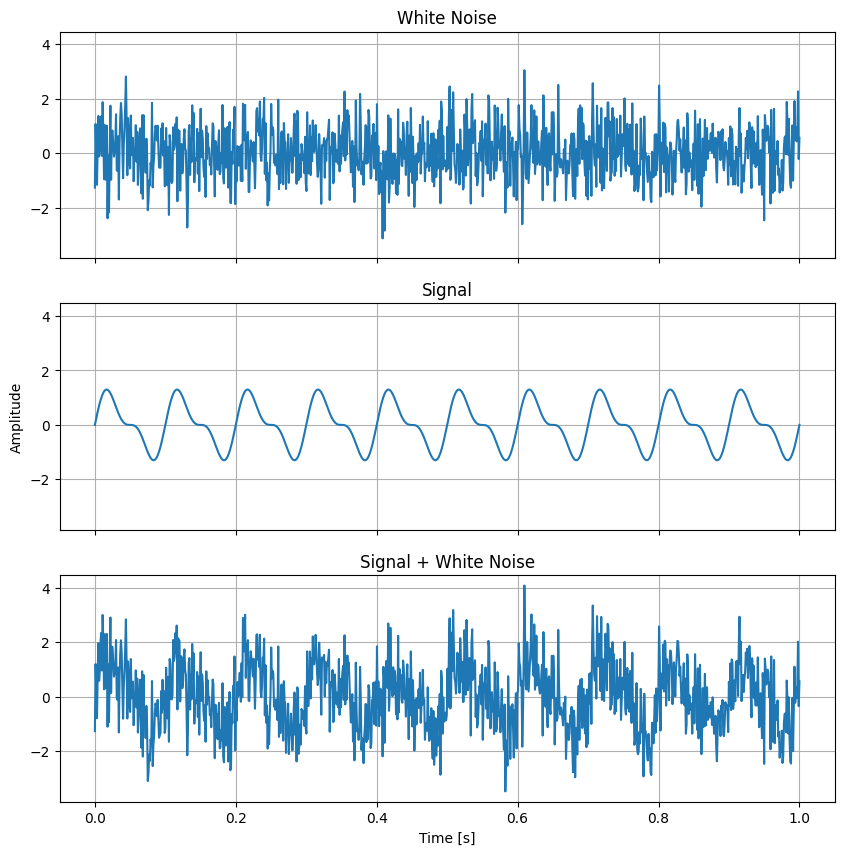

In [201]:

fig, ax = plt.subplots(3,1, figsize=(10,10), sharex=True, sharey=True)

ax[0].plot(t, white_noise)
ax[0].grid(True)
ax[0].set_title('White Noise')
ax[1].plot(t, signal)
ax[1].grid(True)
ax[1].set_title('Signal')
ax[2].plot(t, white_noise_signal)
ax[2].set_title('Signal + White Noise')
ax[2].grid(True)

_ = ax[1].set_ylabel('Amplitude')
_ = ax[2].set_xlabel('Time [s]')

## Fourier Analysis

In [202]:
# Now I want to see the signal in the frequency domain
fft_signal = np.fft.fft(signal)

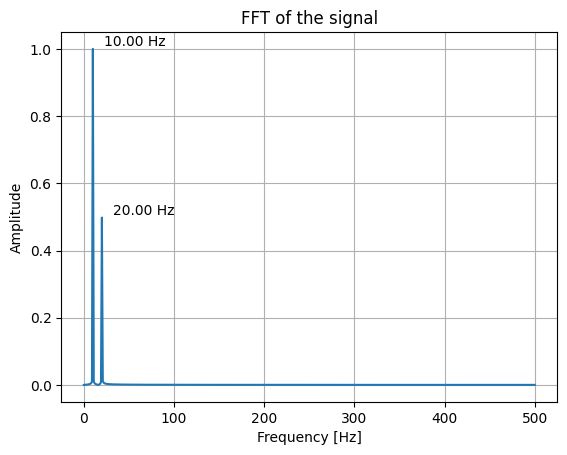

In [209]:
# My frequency axis will be from 0 to fs/2
frequencies = np.linspace(0, fs/2, N//2)

# to plot I want to see only the absolute value of the fft and the first half of the signal (the second half is the mirror of the first)
# I will also normalize the fft 
abs_fft_signal = np.abs(fft_signal)[:N//2] / np.max(np.abs(fft_signal))

# We'll use the find peaks function from scipy to find the peaks in the signal
peaks_found = sp.signal.find_peaks(abs_fft_signal, height=0.2)
freq_peaks = peaks_found[0]

# Plot the absolute value of the FFT signal
plt.plot(frequencies, abs_fft_signal)

# Annotate the frequency of each peak
for freq in freq_peaks:
    peak = abs_fft_signal[freq]
    plt.annotate(f'{freq:.2f} Hz', (freq, peak), textcoords="offset points", xytext=(30,2), ha='center')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('FFT of the signal')
plt.grid()
plt.show()

In [204]:
# We'll use the find peaks function from scipy to find the peaks in the signal
peaks_found = sp.signal.find_peaks(abs_fft_signal, height=0.2)
freq_peak = peaks_found[0]
peak = abs_fft_signal[freq_peak]

In [205]:
# we have two peaks, I want to recuparate the original frequencies
# we can use scipy.signal.find_peaks
peaks, _ = sp.signal.find_peaks(abs_fft_signal, height=0.2) # the height parameter is the minimum height of the peak
peaks

array([10, 20])

### noise fft analisy

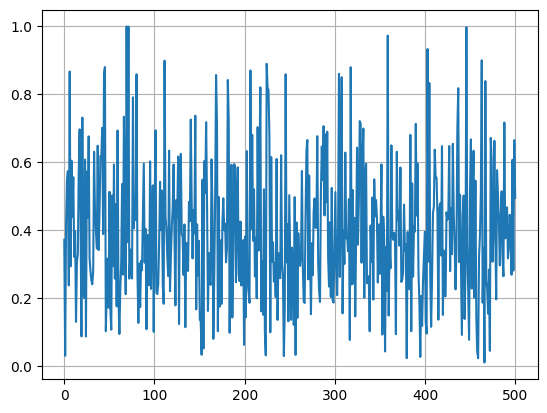

In [206]:
fft_white_noise_signal = np.fft.fft(white_noise)
abs_fft_white_noise = np.abs(fft_white_noise_signal)[:N//2] / np.max(np.abs(fft_white_noise_signal))
plt.plot(frequencies, abs_fft_white_noise)
plt.grid()

## Signal + Noise FFT Analyse

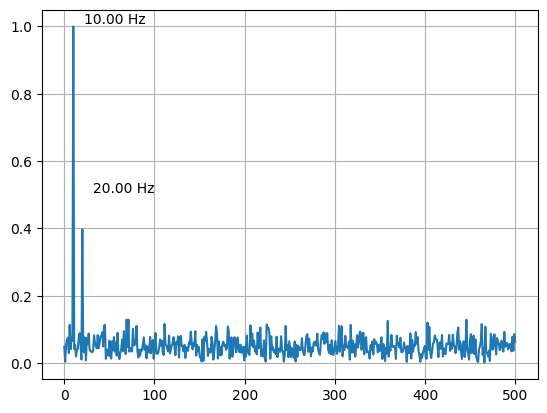

In [207]:
fft_white_noise_signal = np.fft.fft(white_noise_signal)
fft_white_noise_signal = abs(fft_white_noise_signal)
fft_white_noise_signal = fft_white_noise_signal[:N//2] / np.max(fft_white_noise_signal) # normalize the fft and take only the first half


# Annotate the frequency of each peak
for freq in freq_peaks:
    peak = abs_fft_signal[freq]
    plt.annotate(f'{freq:.2f} Hz', (freq, peak), textcoords="offset points", xytext=(30,2), ha='center')

plt.plot(frequencies, fft_white_noise_signal)
plt.grid(True)